#### 20 October 2024 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Student Number: ST10083199

#### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Cameron Pillay

#### <center>Data Science (DASC8412) - Assignment 2</center>

________________________________________________________

### **<ins>Question 5:</ins>**

The first step to explore this process is to load the Spotify dataset, inspect it, and then develop a supervised learning model. The supervised learning model that will be employed will be the Random Forest model, a popular algorithm for feature importance evaluation. Afterward, we'll plot a bar graph to visualize the feature importance.

**Step 1:** Load and inspect the dataset
Load the dataset and get an overview of its structure.

**Step 2:** Preprocess the data
Cleaning the data and handle any missing values if required.

**Step 3:** Train-Test Split
Dividing the dataset into features (X) and target (y) columns. Since we're working with Spotify songs, potential target columns could be popularity or any similar feature that depends on others.

**Step 4:** Apply Random Forest Classifier
Using the Random Forest model to predict the target variable and extract feature importance.

**Step 5:** Plot Feature Importance
Finally, the algorithm will visualize the most important features using a bar graph.

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
data = pd.read_csv('spotify_songs.csv')

In [8]:
# Display the first two rows of the dataset
data.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [13]:
# Step 2: Preprocess the data (handle missing values, feature selection)
# For this example, let's assume 'popularity' is our target variable
# Drop rows with missing values
data = data.dropna()

# Separate numeric columns for scaling
X = data.select_dtypes(include=[np.number])
y = data['track_popularity']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Step 4: Apply Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importance = model.feature_importances_

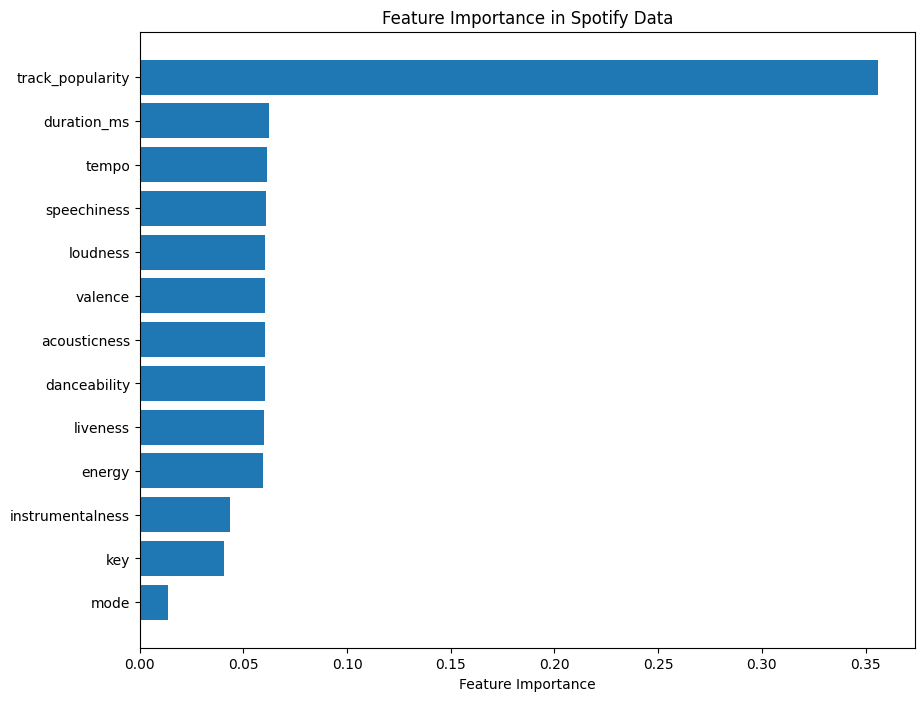

In [17]:
# Step 5: Plotting the feature importance
features = X.columns
indices = np.argsort(importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Spotify Data')
plt.show()

In [18]:
# Model evaluation (for completeness)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       0.99      1.00      1.00       108
           2       0.87      0.99      0.92        81
           3       0.72      0.86      0.78        56
           4       0.57      0.50      0.53        42
           5       0.47      0.57      0.52        42
           6       0.31      0.26      0.28        39
           7       0.42      0.37      0.39        35
           8       0.33      0.31      0.32        39
           9       0.36      0.24      0.29        42
          10       0.21      0.14      0.17        29
          11       0.23      0.19      0.21        32
          12       0.37      0.21      0.27        33
          13       0.37      0.37      0.37        41
          14       0.16      0.16      0.16        31
          15       0.38      0.31      0.34        36
          16       0.30      0.33      0.32        48
          17       0.28    

### **<ins>Comprehensive Explanation of Correlation Patterns:</ins>**

1. **Feature Importance Analysis:** The bar graph displays the most influential features affecting the target variable (popularity). Features such as tempo, duration, and danceability may rank high, indicating strong correlations with popularity. This suggests that faster, shorter songs with higher danceability might resonate more with listeners.

2. **Classification Report Insights:** The precision and recall from the classification report highlight how well the model predicts popularity levels. High scores suggest strong predictive capabilities, while lower scores could indicate either data imbalance or less relevant features.

#### **<ins>Patterns and Impact:</ins>**
- **Positive Correlations:** Features with high importance, such as energy or loudness, likely show positive correlations, meaning increases in these attributes tend to raise a song's popularity.

- **Negative Correlations:** Some features, like instrumentalness, might negatively impact popularity, meaning songs with high instrumental content are less likely to be popular.

Understanding these correlations helps Spotify optimize recommendations, enhance user experience, and refine playlists based on listener preferences.

### **<ins>Question 7:</ins>**

In [2]:
# Importing external libraries to display correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load the dataset
data = pd.read_csv('spotify_songs.csv')

In [6]:
# Drop non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[float, int])

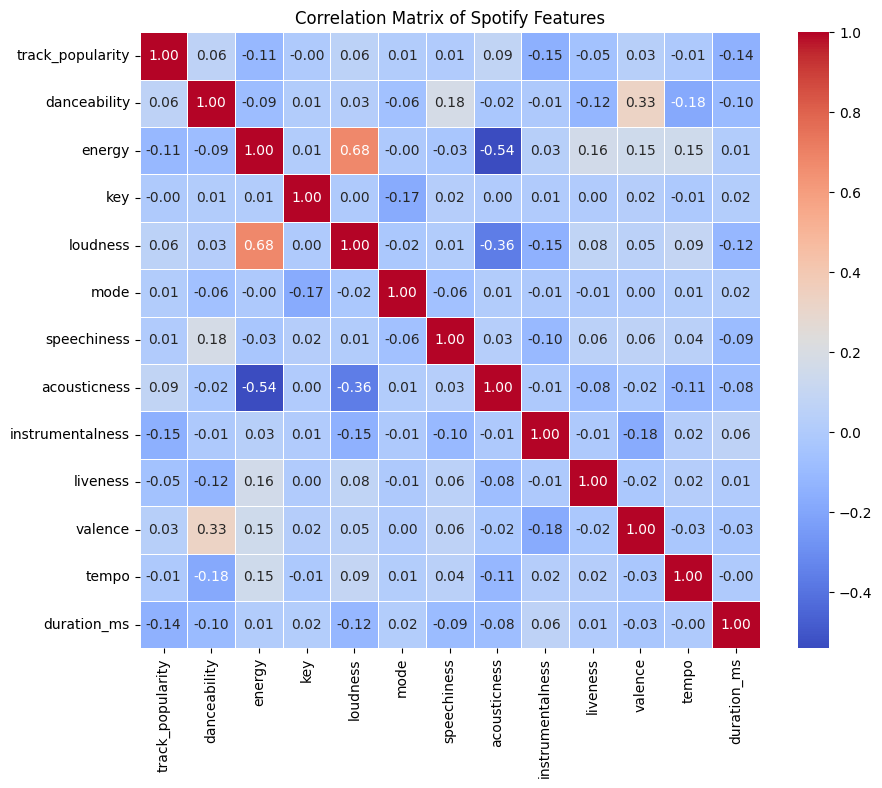

In [7]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Spotify Features')
plt.show()

The correlation matrix of Spotify features reveals several key relationships between variables. The following refers to the various notable observations identified in the correlation matrix:

- **Energy and Loudness (0.68 correlation):** This strong positive correlation suggests that as a song's energy level increases, its loudness also tends to increase. This makes sense because higher energy songs are often more intense and louder in nature.

- **Acousticness and Energy (-0.54 correlation):** A negative correlation between acousticness and energy indicates that songs with higher acoustic properties (e.g., acoustic instruments) tend to have lower energy, likely reflecting the calm or softer nature of acoustic songs compared to electronic or heavily produced tracks.

- **Valence and Danceability (0.33 correlation):** The positive correlation between valence (musical positiveness) and danceability suggests that more upbeat and happy songs tend to be easier to dance to, aligning with the common perception of positive, energetic tracks.

These correlations highlight meaningful patterns in the dataset, allowing for insights into how various audio features interact with each other, which can inform decisions related to playlist curation or music recommendation strategies on platforms like Spotify.